In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


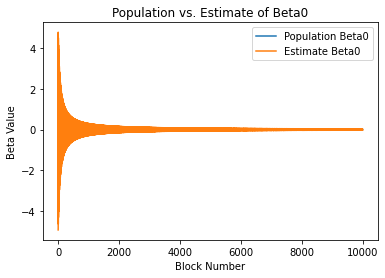

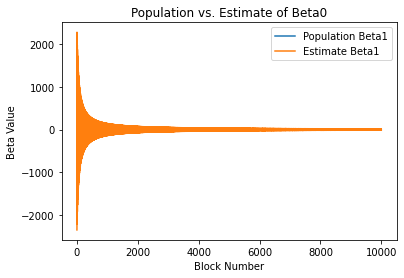

In [2]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [3]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.926108,-2354.971441,0.0,0.001,1
1,-4.849661,-2318.424843,0.0,0.001,2
2,4.775549,2282.995237,0.0,0.001,3
3,4.703669,2248.632185,0.0,0.001,4
4,-4.633920,-2215.288242,0.0,0.001,5
...,...,...,...,...,...
9995,-0.031068,-14.852555,0.0,0.001,9996
9996,0.031065,14.851079,0.0,0.001,9997
9997,-0.031062,-14.849603,0.0,0.001,9998
9998,0.031059,14.848127,0.0,0.001,9999


## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


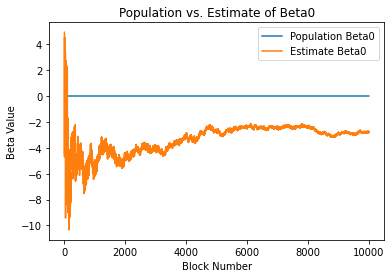

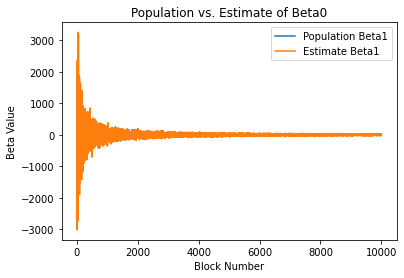

In [4]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [5]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.926108,2361.067433,0.0,0.001,1
1,4.849661,2324.426231,0.0,0.001,2
2,4.775549,2288.904913,0.0,0.001,3
3,-4.703669,-2621.750706,0.0,0.001,4
4,4.633920,819.503823,0.0,0.001,5
...,...,...,...,...,...
9995,-2.703205,33.424006,0.0,0.001,9996
9996,-2.765067,1.119966,0.0,0.001,9997
9997,-2.764792,1.119854,0.0,0.001,9998
9998,-2.764518,1.119743,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


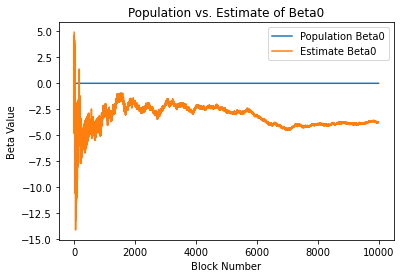

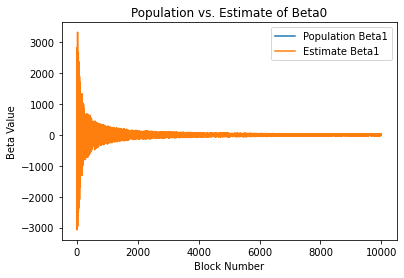

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [7]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.926108,2241.521676,0.0,0.001,1
1,-4.849661,-2700.430030,0.0,0.001,2
2,4.775549,1565.309420,0.0,0.001,3
3,-4.703669,-3073.771069,0.0,0.001,4
4,4.633920,1487.385782,0.0,0.001,5
...,...,...,...,...,...
9995,-3.781517,-3.813845,0.0,0.001,9996
9996,-3.781142,-6.108829,0.0,0.001,9997
9997,-3.780766,-6.965908,0.0,0.001,9998
9998,-3.718272,23.394715,0.0,0.001,9999


In [8]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.39367227635272667


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


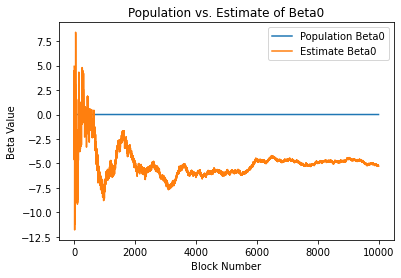

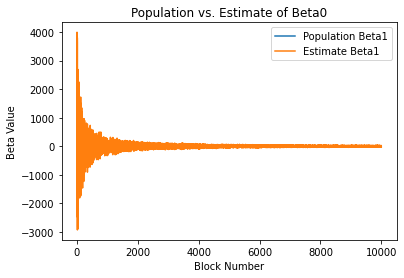

In [9]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [10]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.926108,2777.451539,0.0,0.001,1
1,4.849661,3372.820637,0.0,0.001,2
2,4.775549,3667.007811,0.0,0.001,3
3,4.703669,3988.554665,0.0,0.001,4
4,-4.633920,-1776.536700,0.0,0.001,5
...,...,...,...,...,...
9995,-5.228856,6.884207,0.0,0.001,9996
9996,-5.290467,-21.363348,0.0,0.001,9997
9997,-5.227816,12.936569,0.0,0.001,9998
9998,-5.289415,-21.877214,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


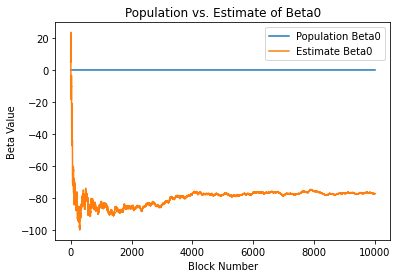

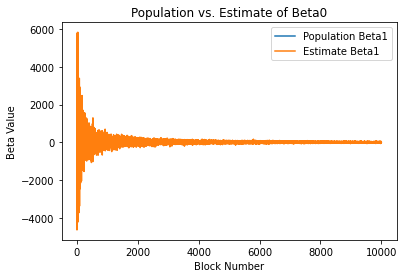

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0           4.926108    -1408.660498               0.0             0.001   
1          14.548982      881.667977               0.0             0.001   
2          14.326648    -4647.022645               0.0             0.001   
3          23.518344     3131.008040               0.0             0.001   
4          13.901761     5798.742657               0.0             0.001   
...              ...             ...               ...               ...   
9995      -77.190464       32.412892               0.0             0.001   
9996      -77.244921      -10.244931               0.0             0.001   
9997      -77.175118      -18.462401               0.0             0.001   
9998      -77.043211       -6.943271               0.0             0.001   
9999      -77.035555       -9.444450               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [11]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)